## Designing Smart and Healthy Systems
### HW 1: Exploratory Data Analysis and Data Preparation - Task 2

#### Group 4: Batshur (Shuree) Gootiz, Sanjana Kotecha

In [35]:
# Imports required to load the datasets from S3 Bucket
import os
import boto3
from boto3 import client
import botocore

# Additional imports required for the homework tasks
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#### Read and Describe data

In [36]:
# Function to read the data from csv file
def read_data_from_csv(filename,bucketname):
    dataframe = pd.read_csv('s3://{}/{}'.format(bucketname, filename), encoding = 'ISO-8859-1')
    return dataframe.copy()

# Function to read the data from excel sheet
def read_data_from_excel(filename,sheetname,bucketname):
    dataframe = pd.read_excel('s3://{}/{}'.format(bucketname, filename), sheetname, encoding = 'ISO-8859-1')
    return dataframe.copy()

# Function to display basic data info
def display_basic_data(dataframe):
    #Get the first 5 rows of the CSV
    display(dataframe.head(5))
    dataframe.info()

#### Getting the engagement levels from the HW2

In [37]:
overall_engagegment_df = pd.read_csv('outcome_var.csv')

# Triming the dataset to get only first 12 months of engagement
year_engagegment_df = overall_engagegment_df.loc[:,'IdPaciente':'M12'].copy()
year_engagegment_df.head()

,IdPaciente,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12
0,0.0,6.75,6.75,6.2,6.75,5.0,6.25,5.67,5.25,5.67,6.75,7.0,7.0
1,1.0,12.00,2.00,2.0,7.00,2.0,2.00,2.00,2.00,2.00,2.00,2.0,3.0
2,2.0,3.00,2.00,2.0,2.00,2.0,2.00,2.00,2.00,2.00,2.00,2.0,2.0
3,3.0,6.50,4.00,2.0,3.00,2.0,2.00,2.00,2.00,2.00,2.00,2.0,2.0
4,4.0,10.00,2.00,2.0,2.00,2.0,2.00,2.00,2.00,2.00,2.00,2.0,2.0


#### Using the clustering analysis from the previous 

In [41]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=1000, 
    tol=1e-05, random_state=0
)
y_km = km.fit_predict(year_engagegment_df.loc[:,'M1':])

year_engagegment_df.head()

,IdPaciente,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,cluster
0,0.0,6.75,6.75,6.2,6.75,5.0,6.25,5.67,5.25,5.67,6.75,7.0,7.0,2
1,1.0,12.00,2.00,2.0,7.00,2.0,2.00,2.00,2.00,2.00,2.00,2.0,3.0,1
2,2.0,3.00,2.00,2.0,2.00,2.0,2.00,2.00,2.00,2.00,2.00,2.0,2.0,1
3,3.0,6.50,4.00,2.0,3.00,2.0,2.00,2.00,2.00,2.00,2.00,2.0,2.0,1
4,4.0,10.00,2.00,2.0,2.00,2.0,2.00,2.00,2.00,2.00,2.00,2.0,2.0,1


In [42]:
year_engagegment_df['cluster'] = y_km

year_engagegment_df['cluster'].unique()

array([1, 0, 2])

In [43]:
print(year_engagegment_df[year_engagegment_df['cluster']==0].shape[0])
year_engagegment_df[year_engagegment_df['cluster']==0].head(10)

6614


,IdPaciente,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,cluster
1,1.0,12.0,2.0,2.0,7.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,0
2,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0
3,3.0,6.5,4.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0
4,4.0,10.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0
5,5.0,6.5,2.0,2.0,6.5,2.0,2.0,10.0,2.0,2.0,3.0,6.5,2.0,0
7,7.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0
8,9.0,8.0,8.0,2.0,2.0,6.0,2.0,10.0,2.0,2.0,6.0,10.0,2.0,0
9,10.0,8.0,8.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0
10,11.0,6.5,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0
13,19.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0


In [44]:
plot0_df = year_engagegment_df[year_engagegment_df['cluster']==0].iloc[:20].transpose()

In [45]:
month_plot0 = plot0_df.loc['M1':'M12']

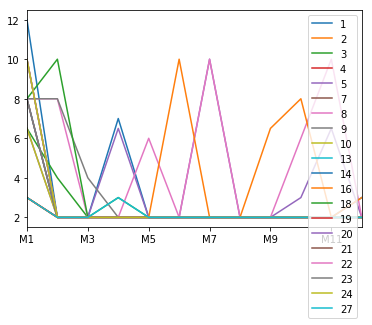

In [46]:
month_plot0.plot.line()

In [47]:
print(year_engagegment_df[year_engagegment_df['cluster']==1].shape[0])
year_engagegment_df[year_engagegment_df['cluster']==1].head(10)

3174


,IdPaciente,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,cluster
0,0.0,6.75,6.75,6.2,6.75,5.0,6.25,5.67,5.25,5.67,6.75,7.0,7.0,1
6,6.0,10.00,2.00,2.0,10.00,2.0,2.00,10.00,8.00,2.00,10.00,2.0,2.0,1
12,15.0,10.00,8.00,8.0,6.50,2.0,2.00,2.00,2.00,10.00,8.00,7.0,10.0,1
15,23.0,10.00,2.00,2.0,10.00,2.0,2.00,10.00,8.00,3.00,10.00,2.0,2.0,1
49,96.0,10.00,6.00,8.0,10.00,2.0,2.00,10.00,8.00,2.00,3.00,10.0,6.0,1
50,97.0,8.00,8.00,9.0,8.00,8.0,2.00,10.00,8.00,8.00,7.00,8.0,8.0,1
73,172.0,8.00,10.00,3.0,10.00,2.0,2.00,8.00,8.00,8.00,9.00,2.0,6.0,1
88,204.0,10.00,8.00,8.0,10.00,7.0,8.00,8.00,10.00,2.00,7.00,10.0,2.0,1
104,243.0,10.00,2.00,2.0,6.00,10.0,2.00,2.00,9.00,2.00,10.00,10.0,2.0,1
105,244.0,3.00,10.00,2.0,2.00,2.0,8.00,8.00,8.00,8.00,8.00,8.0,10.0,1


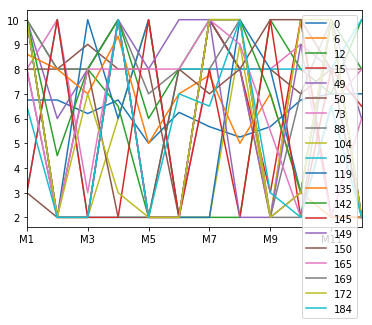

In [48]:
plot1_df = year_engagegment_df[year_engagegment_df['cluster']==1].iloc[:20].transpose()
month_plot1 = plot1_df.loc['M1':'M12'].copy()
month_plot1.plot.line()

In [49]:
print(year_engagegment_df[year_engagegment_df['cluster']==2].shape[0])
year_engagegment_df[year_engagegment_df['cluster']==2].head(10)

4119


,IdPaciente,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,cluster
11,14.0,6.50,8.0,3.0,7.50,12.00,12.0,2.0,2.0,2.0,2.00,2.0,2.0,2
17,28.0,10.00,7.0,2.0,8.00,2.00,2.0,8.0,3.0,3.5,3.00,4.5,2.0,2
25,37.0,8.00,10.0,2.0,3.00,10.00,2.0,2.0,10.0,2.0,2.00,10.0,2.0,2
26,40.0,6.00,3.0,10.0,2.00,2.00,9.0,2.0,2.0,6.5,2.00,2.0,8.0,2
30,44.0,9.00,3.0,4.5,10.00,2.00,2.0,10.0,2.0,2.0,3.00,3.0,2.0,2
42,75.0,6.33,3.0,2.0,9.33,8.00,3.0,5.0,2.0,2.0,9.33,2.0,2.0,2
48,91.0,3.00,10.0,8.0,2.00,3.00,2.0,2.0,2.0,2.0,2.00,2.0,2.0,2
52,102.0,6.50,2.0,10.0,10.00,2.00,2.0,10.0,2.0,2.0,10.00,2.0,2.0,2
54,105.0,10.00,2.0,10.0,2.00,6.75,2.0,2.0,4.0,7.0,2.00,2.0,10.0,2
59,111.0,6.00,10.0,8.0,3.00,3.00,2.0,2.0,2.0,2.0,2.00,2.0,2.0,2


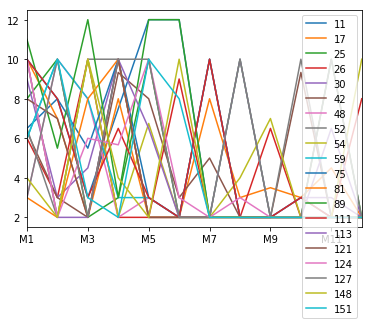

In [50]:
plot2_df = year_engagegment_df[year_engagegment_df['cluster']==2].iloc[:20].transpose()
month_plot2 = plot2_df.loc['M1':'M12'].copy()
month_plot2.plot.line()

In [51]:
month_list = [0] * 12
for i in range(12):
    month_list[i] = "M" + str(i+1)

In [52]:
avg_plot0 = year_engagegment_df[year_engagegment_df['cluster']==0].loc[:,'M1':'M12'].mean()
avg_plot1 = year_engagegment_df[year_engagegment_df['cluster']==1].loc[:,'M1':'M12'].mean()
avg_plot2 = year_engagegment_df[year_engagegment_df['cluster']==2].loc[:,'M1':'M12'].mean()

Text(0, 0.5, 'Engagement')

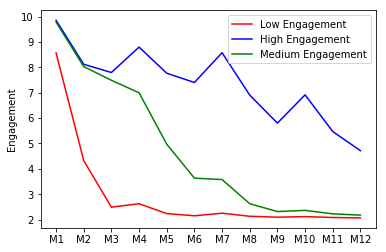

In [470]:
fig, ax = plt.subplots()
low_eng = ax.plot(avg_plot0, color='red',label='Low Engagement')
high_eng = ax.plot(avg_plot1, color='blue', label='High Engagement')
medium_eng = ax.plot(avg_plot2, color='green', label = 'Medium Engagement')
ax.legend(loc='best')
ax.set_ylabel('Engagement')

In [54]:
year_engagegment_df[year_engagegment_df['cluster']==0].to_csv('low_engagemnet_cluster.csv')
year_engagegment_df[year_engagegment_df['cluster']==1].to_csv('high_engagemnet_cluster.csv')
year_engagegment_df[year_engagegment_df['cluster']==2].to_csv('medium_engagemnet_cluster.csv')

In [55]:
high_df = pd.read_csv('high_engagemnet_cluster.csv')
medium_df = pd.read_csv('medium_engagemnet_cluster.csv')
low_df = pd.read_csv('low_engagemnet_cluster.csv')


high_df = high_df.loc[:,'IdPaciente':]
medium_df = medium_df.loc[:,'IdPaciente':]
low_df = low_df.loc[:,'IdPaciente':]

In [56]:
[low_df.shape[0], medium_df.shape[0], high_df.shape[0]]

[6614, 4119, 3174]

In [57]:
#Insert Quarters in each df:
file_list=[low_df, medium_df, high_df]
for file in file_list:
    file['Q1'] =file[['M1','M2','M3']].max(axis=1)
    file['Q2'] =file[['M4','M5','M6']].max(axis=1)
    file['Q3'] =file[['M7','M8','M9']].max(axis=1)
    file['Q4'] =file[['M10','M11','M12']].max(axis=1)


In [58]:
high_df.sort_values('IdPaciente').head(10)

,IdPaciente,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,cluster,Q1,Q2,Q3,Q4
0,0.0,6.75,6.75,6.2,6.75,5.0,6.25,5.67,5.25,5.67,6.75,7.0,7.0,1,6.75,6.75,5.67,7.0
1,6.0,10.00,2.00,2.0,10.00,2.0,2.00,10.00,8.00,2.00,10.00,2.0,2.0,1,10.00,10.00,10.00,10.0
2,15.0,10.00,8.00,8.0,6.50,2.0,2.00,2.00,2.00,10.00,8.00,7.0,10.0,1,10.00,6.50,10.00,10.0
3,23.0,10.00,2.00,2.0,10.00,2.0,2.00,10.00,8.00,3.00,10.00,2.0,2.0,1,10.00,10.00,10.00,10.0
4,96.0,10.00,6.00,8.0,10.00,2.0,2.00,10.00,8.00,2.00,3.00,10.0,6.0,1,10.00,10.00,10.00,10.0
5,97.0,8.00,8.00,9.0,8.00,8.0,2.00,10.00,8.00,8.00,7.00,8.0,8.0,1,9.00,8.00,10.00,8.0
6,172.0,8.00,10.00,3.0,10.00,2.0,2.00,8.00,8.00,8.00,9.00,2.0,6.0,1,10.00,10.00,8.00,9.0
7,204.0,10.00,8.00,8.0,10.00,7.0,8.00,8.00,10.00,2.00,7.00,10.0,2.0,1,10.00,10.00,10.00,10.0
8,243.0,10.00,2.00,2.0,6.00,10.0,2.00,2.00,9.00,2.00,10.00,10.0,2.0,1,10.00,10.00,9.00,10.0
9,244.0,3.00,10.00,2.0,2.00,2.0,8.00,8.00,8.00,8.00,8.00,8.0,10.0,1,10.00,8.00,8.00,10.0


In [59]:
medium_df.sort_values('IdPaciente').head(10)

,IdPaciente,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,cluster,Q1,Q2,Q3,Q4
0,14.0,6.50,8.0,3.0,7.50,12.00,12.0,2.0,2.0,2.0,2.00,2.0,2.0,2,8.00,12.00,2.0,2.00
1,28.0,10.00,7.0,2.0,8.00,2.00,2.0,8.0,3.0,3.5,3.00,4.5,2.0,2,10.00,8.00,8.0,4.50
2,37.0,8.00,10.0,2.0,3.00,10.00,2.0,2.0,10.0,2.0,2.00,10.0,2.0,2,10.00,10.00,10.0,10.00
3,40.0,6.00,3.0,10.0,2.00,2.00,9.0,2.0,2.0,6.5,2.00,2.0,8.0,2,10.00,9.00,6.5,8.00
4,44.0,9.00,3.0,4.5,10.00,2.00,2.0,10.0,2.0,2.0,3.00,3.0,2.0,2,9.00,10.00,10.0,3.00
5,75.0,6.33,3.0,2.0,9.33,8.00,3.0,5.0,2.0,2.0,9.33,2.0,2.0,2,6.33,9.33,5.0,9.33
6,91.0,3.00,10.0,8.0,2.00,3.00,2.0,2.0,2.0,2.0,2.00,2.0,2.0,2,10.00,3.00,2.0,2.00
7,102.0,6.50,2.0,10.0,10.00,2.00,2.0,10.0,2.0,2.0,10.00,2.0,2.0,2,10.00,10.00,10.0,10.00
8,105.0,10.00,2.0,10.0,2.00,6.75,2.0,2.0,4.0,7.0,2.00,2.0,10.0,2,10.00,6.75,7.0,10.00
9,111.0,6.00,10.0,8.0,3.00,3.00,2.0,2.0,2.0,2.0,2.00,2.0,2.0,2,10.00,3.00,2.0,2.00


In [60]:
low_df.sort_values('IdPaciente').head(10)

,IdPaciente,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,cluster,Q1,Q2,Q3,Q4
0,1.0,12.0,2.0,2.0,7.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,0,12.0,7.0,2.0,3.0
1,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,3.0,2.0,2.0,2.0
2,3.0,6.5,4.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,6.5,3.0,2.0,2.0
3,4.0,10.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,10.0,2.0,2.0,2.0
4,5.0,6.5,2.0,2.0,6.5,2.0,2.0,10.0,2.0,2.0,3.0,6.5,2.0,0,6.5,6.5,10.0,6.5
5,7.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,3.0,2.0,2.0,2.0
6,9.0,8.0,8.0,2.0,2.0,6.0,2.0,10.0,2.0,2.0,6.0,10.0,2.0,0,8.0,6.0,10.0,10.0
7,10.0,8.0,8.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,8.0,2.0,2.0,2.0
8,11.0,6.5,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,6.5,2.0,2.0,2.0
9,19.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,8.0,2.0,2.0,2.0


In [61]:
#Further slicing: Count pats who have eng level >6 in q3 and q4 = 88 cases

low_df.loc[(low_df['Q4'] >6) & (low_df['Q3']>6)].count()  #88 mod eng

low_df.loc[(low_df['M9'] >6)].count()    #95 mod patients

IdPaciente    76
M1            76
M2            76
M3            76
M4            76
M5            76
M6            76
M7            76
M8            76
M9            76
M10           76
M11           76
M12           76
cluster       76
Q1            76
Q2            76
Q3            76
Q4            76
dtype: int64

In [62]:
#Put these patients into the medium engagement cohort
#mod1 =low_df.loc[(low_df['Q4'] >6) & (low_df['Q3']>6) ]

mod2=low_df.loc[(low_df['M9'] >6)]

medium =pd.concat([mod2], ignore_index=True)

low_df=low_df[~low_df.IdPaciente.isin(medium.IdPaciente)]

In [63]:
mod2.sort_values('IdPaciente').head(10)

,IdPaciente,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,cluster,Q1,Q2,Q3,Q4
11,27.0,3.0,2.0,2.0,2.0,2.0,10.0,2.0,2.0,6.5,8.0,2.00,3.0,0,3.0,10.0,6.5,8.00
22,48.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,10.0,10.0,2.0,2.00,2.0,0,3.0,2.0,10.0,2.00
27,61.0,3.0,2.0,2.0,8.0,8.0,2.0,2.0,2.0,10.0,7.0,2.00,2.0,0,3.0,8.0,10.0,7.00
73,220.0,8.0,3.0,2.0,3.0,2.0,2.0,9.0,8.0,8.0,10.0,2.00,2.0,0,8.0,3.0,9.0,10.00
105,304.0,7.0,2.0,2.0,2.0,2.0,2.0,2.0,9.5,8.0,8.0,9.33,8.0,0,7.0,2.0,9.5,9.33
148,441.0,10.0,4.5,2.0,3.0,10.0,2.0,2.0,3.0,6.5,2.0,2.00,2.0,0,10.0,10.0,6.5,2.00
165,487.0,7.0,3.0,10.0,3.0,2.0,3.0,2.0,2.0,10.0,2.0,2.00,2.0,0,10.0,3.0,10.0,2.00
215,597.0,8.0,10.0,2.0,4.0,2.0,2.0,2.0,2.0,10.0,8.0,4.50,3.0,0,10.0,4.0,10.0,8.00
224,616.0,8.0,8.0,2.0,2.0,2.0,3.0,2.0,2.0,10.0,3.0,6.50,6.5,0,8.0,3.0,10.0,6.50
245,653.0,8.0,2.0,8.0,3.0,3.0,10.0,2.0,2.0,10.0,2.0,3.00,2.0,0,8.0,10.0,10.0,3.00


In [64]:
#High engagement: It seems these are moderate engaged patients, because no engagements in the last 3 months
#There are 190 patients
mod3 =high_df.loc[(high_df['Q4'] ==2)]  #Slice these out of high engagement append to medium
mod3.describe()

#Drop these from high: 
high_df=high_df[~high_df.IdPaciente.isin(mod3.IdPaciente)]

medium =pd.concat([medium, mod3], ignore_index=True)
medium.describe()

,IdPaciente,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,cluster,Q1,Q2,Q3,Q4
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,8747.319266,9.701817,7.851229,7.501835,8.359450,7.742936,7.951560,8.443872,6.290055,4.964661,2.291761,2.147083,2.148165,0.860550,10.017009,9.422514,9.916128,2.386092
std,2876.056479,1.434689,2.346938,2.824045,2.816846,2.825393,3.043858,3.014379,3.254279,3.364034,1.206529,0.863280,0.888652,0.346733,1.282323,2.579422,1.341587,1.442577
min,27.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,3.000000,2.000000,6.500000,2.000000
25%,7381.000000,9.500000,7.500000,7.000000,7.500000,7.500000,7.500000,7.500000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,9.500000,9.000000,9.330000,2.000000
50%,10098.000000,10.000000,8.000000,8.000000,9.330000,8.000000,8.000000,9.330000,8.000000,3.000000,2.000000,2.000000,2.000000,1.000000,10.000000,10.000000,10.000000,2.000000
75%,10629.000000,10.000000,9.330000,10.000000,10.000000,10.000000,10.000000,10.000000,8.000000,8.000000,2.000000,2.000000,2.000000,1.000000,11.000000,11.000000,11.000000,2.000000
max,11647.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,11.000000,1.000000,12.000000,12.000000,12.000000,12.000000


In [65]:
mod3.sort_values('IdPaciente').head(10)

,IdPaciente,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,cluster,Q1,Q2,Q3,Q4
21,461.0,4.5,9.0,8.0,2.0,8.0,8.00,8.0,10.0,2.0,2.0,2.0,2.0,1,9.0,8.0,10.0,2.0
27,507.0,5.5,8.0,10.0,8.0,4.0,10.00,8.0,2.0,10.0,2.0,2.0,2.0,1,10.0,10.0,10.0,2.0
71,800.0,8.0,8.0,10.0,8.0,8.0,8.00,8.0,8.0,3.0,2.0,2.0,2.0,1,10.0,8.0,8.0,2.0
100,1039.0,5.5,2.0,10.0,7.0,2.0,6.33,8.0,8.0,8.0,2.0,2.0,2.0,1,10.0,7.0,8.0,2.0
110,1119.0,8.0,5.5,3.0,8.0,8.0,8.00,8.0,7.0,3.0,2.0,2.0,2.0,1,8.0,8.0,8.0,2.0
306,2450.0,3.0,9.0,8.0,4.0,10.0,5.50,8.0,9.0,4.5,2.0,2.0,2.0,1,9.0,10.0,9.0,2.0
326,2549.0,9.0,8.0,8.0,9.0,8.0,5.50,10.0,5.5,3.0,2.0,2.0,2.0,1,9.0,9.0,10.0,2.0
347,2670.0,10.0,6.0,8.0,10.0,8.0,8.00,10.0,5.0,2.0,2.0,2.0,2.0,1,10.0,10.0,10.0,2.0
356,2747.0,9.0,8.0,8.0,10.0,8.0,8.00,10.0,8.0,2.0,2.0,2.0,2.0,1,9.0,10.0,10.0,2.0
364,2815.0,10.0,8.0,5.5,10.0,8.0,3.00,10.0,8.0,3.0,2.0,2.0,2.0,1,10.0,10.0,10.0,2.0


In [66]:
high_df.describe()

,IdPaciente,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,cluster,Q1,Q2,Q3,Q4
count,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.0,2705.000000,2705.00000,2705.000000,2705.000000
mean,6039.500924,9.857564,8.077353,7.721926,8.733006,7.637634,7.163031,8.449664,6.932492,6.055538,7.769320,6.073771,5.186802,1.0,10.108518,9.65715,9.473006,8.955701
std,2490.860579,1.240095,1.844081,2.301554,2.048203,2.472136,2.777075,2.340420,2.637653,2.836883,2.843508,3.069834,3.180834,0.0,1.033474,1.30502,1.246878,2.077544
min,0.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,3.000000,2.00000,2.000000,3.000000
25%,4380.000000,9.500000,7.800000,7.330000,8.000000,7.000000,5.500000,7.750000,5.000000,3.000000,6.500000,3.000000,2.000000,1.0,9.500000,9.00000,9.000000,8.000000
50%,6295.000000,10.000000,8.000000,8.000000,9.330000,8.000000,8.000000,9.330000,8.000000,7.670000,9.000000,7.000000,3.000000,1.0,10.000000,10.00000,10.000000,10.000000
75%,8142.000000,10.000000,9.000000,9.000000,10.000000,9.330000,9.000000,10.000000,8.000000,8.000000,10.000000,8.000000,8.000000,1.0,11.000000,10.00000,10.000000,10.000000
max,9909.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,1.0,12.000000,12.00000,12.000000,12.000000


In [67]:
low_df.shape

(6538, 18)

In [68]:
#How many 2s are in Q3 or as of M9 in med eng clusters? There 1191 patients that have dropped engagements after month 5 or 6
#and no engagements at all in Q3 and Q4
low1=medium_df.loc[(medium_df['Q3'] ==2) & (medium_df['Q4']==2)]

medium_df=medium_df[~medium_df.IdPaciente.isin(low1.IdPaciente)]   #drop from medium engagement cluster


#Combine these with medium engagement patients sliced from High and Low

medium_df=pd.concat([medium_df, medium], ignore_index=True)  #adding about 373 rows
medium_df.describe()

,IdPaciente,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,cluster,Q1,Q2,Q3,Q4
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,7439.679295,9.717326,7.764614,7.043113,7.856984,6.106125,5.048766,5.755285,3.843387,3.093050,2.619509,2.378008,2.302014,1.767067,10.047701,8.968500,6.844119,3.052157
std,3321.827684,1.393557,2.095137,2.709087,2.730816,3.046790,3.282247,3.269938,2.760490,2.362711,1.712530,1.422062,1.296405,0.485570,1.114738,2.125438,3.151626,2.294263
min,27.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,3.000000,2.000000,2.000000,2.000000
25%,4915.750000,9.500000,7.330000,5.500000,6.500000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,9.500000,8.000000,3.000000,2.000000
50%,8157.500000,10.000000,8.000000,8.000000,8.600000,7.000000,3.000000,4.500000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,10.000000,9.500000,7.500000,2.000000
75%,10410.750000,10.000000,9.000000,9.000000,10.000000,8.000000,8.000000,9.330000,5.000000,3.000000,2.000000,2.000000,2.000000,2.000000,11.000000,10.000000,10.000000,3.000000
max,11670.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,2.000000,12.000000,12.000000,12.000000,12.000000


In [69]:
#Concat Low1 dataframe with Low_DF, because these are low engagement patients
low_df =pd.concat([low_df, low1], ignore_index=True)
low_df.shape

(8536, 18)

In [70]:
medium_df.sort_values('IdPaciente').head(10)

,IdPaciente,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,cluster,Q1,Q2,Q3,Q4
2121,27.0,3.00,2.0,2.0,2.00,2.00,10.0,2.0,2.0,6.5,8.00,2.0,3.0,0,3.00,10.00,6.5,8.00
0,28.0,10.00,7.0,2.0,8.00,2.00,2.0,8.0,3.0,3.5,3.00,4.5,2.0,2,10.00,8.00,8.0,4.50
1,37.0,8.00,10.0,2.0,3.00,10.00,2.0,2.0,10.0,2.0,2.00,10.0,2.0,2,10.00,10.00,10.0,10.00
2,40.0,6.00,3.0,10.0,2.00,2.00,9.0,2.0,2.0,6.5,2.00,2.0,8.0,2,10.00,9.00,6.5,8.00
3,44.0,9.00,3.0,4.5,10.00,2.00,2.0,10.0,2.0,2.0,3.00,3.0,2.0,2,9.00,10.00,10.0,3.00
2122,48.0,3.00,2.0,2.0,2.00,2.00,2.0,2.0,10.0,10.0,2.00,2.0,2.0,0,3.00,2.00,10.0,2.00
2123,61.0,3.00,2.0,2.0,8.00,8.00,2.0,2.0,2.0,10.0,7.00,2.0,2.0,0,3.00,8.00,10.0,7.00
4,75.0,6.33,3.0,2.0,9.33,8.00,3.0,5.0,2.0,2.0,9.33,2.0,2.0,2,6.33,9.33,5.0,9.33
5,102.0,6.50,2.0,10.0,10.00,2.00,2.0,10.0,2.0,2.0,10.00,2.0,2.0,2,10.00,10.00,10.0,10.00
6,105.0,10.00,2.0,10.0,2.00,6.75,2.0,2.0,4.0,7.0,2.00,2.0,10.0,2,10.00,6.75,7.0,10.00


In [81]:
data=pd.concat([low_df, medium_df, high_df], ignore_index=True)
data['level'] = np.where(data['cluster']==0, 'low',
                         np.where(data['cluster']==1, 'high', 'medium'))
data=data.loc[:, ['IdPaciente', 'Q1', 'Q2', 'Q3', 'Q4', 'level']]
data.shape

(13907, 6)

In [82]:
list_month= ['IdPaciente', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12']
low_df_rev =low_df[list_month]
med_df_rev =medium_df[list_month]
high_df_rev =high_df[list_month]

Text(0, 0.5, 'Engagement Level')

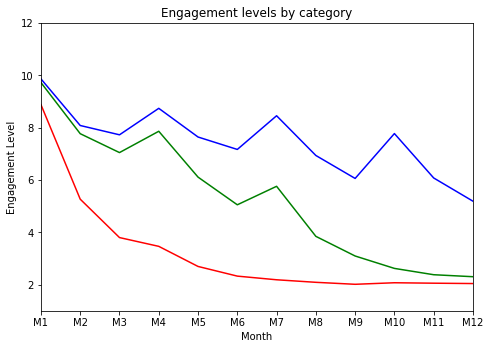

In [471]:
#Reshape from wide to long
low_df_ts=pd.wide_to_long(low_df_rev, ["M"], i="IdPaciente", j="month")
low_df_ts.sort_values(['IdPaciente', 'month']).head()

med_df_ts=pd.wide_to_long(med_df_rev, ["M"], i="IdPaciente", j="month")
med_df_ts.sort_values(['IdPaciente', 'month']).head()

high_df_ts=pd.wide_to_long(high_df_rev, ["M"], i="IdPaciente", j="month")
high_df_ts.sort_values(['IdPaciente', 'month']).head()

#Average engagement of patients over 12 months among low engagement cluster
low_df_ts.reset_index(level=0, inplace=True)
avg_df_low = low_df_ts.groupby('month').mean()
#avg_df_low['level'] = 'low'

med_df_ts.reset_index(level=0, inplace=True)
avg_df_med = med_df_ts.groupby('month').mean()
#avg_df_med['level'] = 'med'

high_df_ts.reset_index(level=0, inplace=True)
avg_df_high = high_df_ts.groupby('month').mean()
#avg_df_high['level'] = 'high'


#plt.bar(all_eng.index, all_eng['M'])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Engagement levels by category')
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.set_xticklabels(['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12'])
ax.plot(avg_df_low.index, avg_df_low['M'], color = 'red')
ax.plot(avg_df_med.index, avg_df_med['M'], color = 'green')
ax.plot(avg_df_high.index, avg_df_high['M'], color = 'blue')
ax.set_xlim(1,12)
ax.set_ylim(1,12)
ax.set_xlabel("Month")
ax.set_ylabel("Engagement Level")



In [84]:
#Nutritional appointments: 
#Read the II Datos CMU (BAL) file from s3
bucketname = "cmu-dshs-diabetes-data"
s3 = boto3.resource('s3')
my_bucket = s3.Bucket(bucketname)
for my_bucket_object in my_bucket.objects.all():
    print(my_bucket_object)

# Using the client system in the boto3 
conn = client('s3')  
for key in conn.list_objects(Bucket=bucketname)['Contents']:
    print(key['Key'])
    
filename = 'II Datos CMU (BAL).xlsx'
sheetname = 'nutricionevaluacionnutricional'
nutri_assess_df = read_data_from_excel(filename,sheetname,bucketname)
#IMC and Peso are correlated, we will use IMC (BMI)
nutri_assess_df.loc[:, ['IdPaciente', 'Fecha', 'Peso', 'IMC']].sort_values('IdPaciente').head(10)
#This is one of the features to be used in the model set up. 
nutri_assess_BMI=nutri_assess_df.loc[:, ['IdPaciente', 'Fecha','IMC']]

nutri_assess_BMI['Fecha'] = pd.to_datetime(nutri_assess_BMI['Fecha'], errors = 'coerce')
nutri_assess_BMI['year'], nutri_assess_BMI['month'] = nutri_assess_BMI['Fecha'].dt.year, nutri_assess_BMI['Fecha'].dt.month

nutri_assess_BMI.sort_values('IdPaciente').head(10)
#
nutri_assess_df.groupby('IdPaciente')['IdPaciente', 'IMC'].count()

nutri_assess_df['Fecha'] = pd.to_datetime(nutri_assess_df['Fecha'], errors = 'coerce')
nutri_assess_df['year'], nutri_assess_df['month'] = nutri_assess_df['Fecha'].dt.year, nutri_assess_df['Fecha'].dt.month

number_nutri_assess= nutri_assess_df.groupby(['IdPaciente'])[['Peso']].count()
number_nutri_assess.rename(columns = {'Peso':'num_nutri_assess'}, inplace = True)
number_nutri_assess.head()

s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='Balance - Tablas (Parte 1 ) pacientes.csv')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='Balance - Tablas (Parte 1 ).xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='Balance - Tablas (Parte 2 ).xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='Balance - Tablas (Parte 3 ).xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='DataDictionary version 2.xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='I Datos CMU (BAL).xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='II Datos CMU (BAL).xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='III Datos CMU (ENC).xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='IV Datos CMU (BAL).xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='encuestas_servicios_translated.csv')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='evoluciones-1_tran

,num_nutri_assess
IdPaciente,
1,3
2,2
3,2
4,3
5,15


In [85]:
#Descriptive: Nutritional assessments by engagement: bar chart (average number)
#number_nutri_assess - merge with data

desc_data = pd.merge(data, number_nutri_assess, how='inner', on=['IdPaciente'])
desc_data.head(20)  #about 10K data merged


,IdPaciente,Q1,Q2,Q3,Q4,level,num_nutri_assess
0,1.0,12.0,7.0,2.0,3.0,low,3
1,2.0,3.0,2.0,2.0,2.0,low,2
2,3.0,6.5,3.0,2.0,2.0,low,2
3,4.0,10.0,2.0,2.0,2.0,low,3
4,5.0,6.5,6.5,10.0,6.5,low,15
5,7.0,3.0,2.0,2.0,2.0,low,7
6,9.0,8.0,6.0,10.0,10.0,low,17
7,10.0,8.0,2.0,2.0,2.0,low,5
8,11.0,6.5,2.0,2.0,2.0,low,3
9,19.0,8.0,2.0,2.0,2.0,low,16


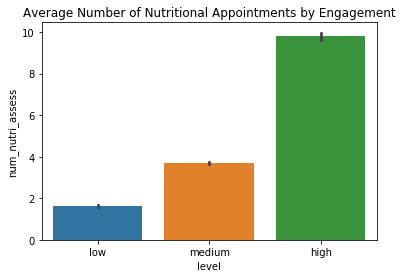

In [86]:
#Figure 1: 
import seaborn as sns
plt.title('Average Number of Nutritional Appointments by Engagement')
ax = sns.barplot(x= 'level', y= 'num_nutri_assess', data=desc_data)

In [211]:
nutri_assess_df['quarter'] = np.where(nutri_assess_df['month'] <=3 , 1,
                                     np.where(np.logical_and(nutri_assess_df['month'] >3, nutri_assess_df['month'] <=6)  , 2,
                                             np.where(np.logical_and(nutri_assess_df['month'] >6, nutri_assess_df['month'] <=9)  , 3, 4)))
nutri_assess_df.head()

,IdEvaluacionNutricional,IdPaciente,Fecha,Hora,Usuario,Peso,Talla,CC,CA,Muneca,...,SillaRuedasNoErguido,Pantorrilla,AlturaRodilla,Brazo,PliegueCutaneo,MediaBrazada,IMC,year,month,quarter
0,1,528,2013-10-05,15:56:00,e5fd4e2c7e689b482829a0ef1a359389,0.0,0.00,0.0,0.0,16.0,...,1,32.6,51.0,25.5,0.1,82.0,0.0,2013,10,4
1,2,97,2012-03-07,00:00:00,e5fd4e2c7e689b482829a0ef1a359389,78.0,1.62,104.0,105.0,16.5,...,0,0.0,0.0,0.0,0.0,0.0,29.7,2012,3,1
2,5,244,2012-05-10,10:15:00,e5fd4e2c7e689b482829a0ef1a359389,0.0,0.00,99.5,103.0,18.9,...,0,0.0,0.0,0.0,0.0,0.0,0.0,2012,5,2
3,6,244,2012-07-12,10:00:00,e5fd4e2c7e689b482829a0ef1a359389,0.0,0.00,95.5,93.0,18.9,...,0,0.0,0.0,0.0,0.0,0.0,0.0,2012,7,3
4,7,244,2012-08-09,09:25:00,e5fd4e2c7e689b482829a0ef1a359389,0.0,0.00,94.0,95.5,18.9,...,0,0.0,0.0,0.0,0.0,0.0,0.0,2012,8,3


In [473]:
nutri_assess_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54460 entries, 0 to 54459
Data columns (total 21 columns):
IdEvaluacionNutricional    54460 non-null int64
IdPaciente                 54460 non-null int64
Fecha                      54460 non-null datetime64[ns]
Hora                       54460 non-null object
Usuario                    54460 non-null object
Peso                       54460 non-null float64
Talla                      54460 non-null float64
CC                         54460 non-null float64
CA                         54460 non-null float64
Muneca                     54460 non-null float64
PorGrasa                   54460 non-null float64
SillaRuedasNoErguido       54460 non-null int64
Pantorrilla                54460 non-null float64
AlturaRodilla              54460 non-null float64
Brazo                      54460 non-null float64
PliegueCutaneo             54460 non-null float64
MediaBrazada               54460 non-null float64
IMC                        54460 non-null 

In [218]:
quart_data = pd.merge(data[['IdPaciente','level']],nutri_assess_df[['IdPaciente','quarter']] , how='inner', on=['IdPaciente'])
quart_data.head()

,IdPaciente,level,quarter
0,1.0,low,4
1,1.0,low,1
2,1.0,low,1
3,2.0,low,4
4,2.0,low,1


In [227]:
count_assess = quart_data.groupby(quart_data.columns.tolist()).size().reset_index().rename(columns={0:'num_assess'})
count_assess.head()

,IdPaciente,level,quarter,num_assess
0,1.0,low,1,2
1,1.0,low,4,1
2,2.0,low,1,1
3,2.0,low,4,1
4,3.0,low,3,1


In [283]:
avg_asessment = count_assess[['level','quarter','num_assess']].groupby(['level','quarter']).mean() 
avg_asessment['eng_level'] = avg_asessment.index

avg_asessment['eng_level_only'] = ['a']*12
for i in range(len(avg_asessment)):
    avg_asessment['eng_level_only'][i] = avg_asessment['eng_level'][i][0]

avg_asessment['quarter'] = [0]*12
for i in range(len(avg_asessment)):
    avg_asessment['quarter'][i] = avg_asessment['eng_level'][i][1]

list_1 = []
list_2 = []
list_3 = []   

    
for i in range(len(avg_asessment)):
    list_1.append(avg_asessment['num_assess'][i])
    list_2.append(avg_asessment['eng_level_only'][i])
    list_3.append(avg_asessment['quarter'][i])
    
    
df_quart = pd.DataFrame({'level': list_2,
                         'quarter': list_3,
                         'num_assess': list_1})

df_quart.head(12)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,level,quarter,num_assess
0,high,1,2.464259
1,high,2,2.659755
2,high,3,2.812606
3,high,4,2.888126
4,low,1,1.327148
5,low,2,1.268072
6,low,3,1.260728
7,low,4,1.323289
8,medium,1,1.662298
9,medium,2,1.644683


In [299]:
sorted_df = df_quart.sort_values(by =['quarter'])
sorted_df.head(12)

,level,quarter,num_assess
0,high,1,2.464259
4,low,1,1.327148
8,medium,1,1.662298
1,high,2,2.659755
5,low,2,1.268072
9,medium,2,1.644683
2,high,3,2.812606
6,low,3,1.260728
10,medium,3,1.757009
3,high,4,2.888126


Text(0, 0.5, 'No. of nutrition assessments')

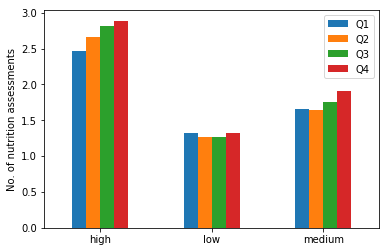

In [406]:
index = ['high','low', 'medium']
q1 = []
q2 = []
q3 = []
q4 = []

q1 = list(df_quart.iloc[:3]['num_assess'])
q2 = list(df_quart.iloc[3:6]['num_assess'])
q3 = list(df_quart.iloc[6:9]['num_assess'])
q4 = list(df_quart.iloc[9:]['num_assess'])


df = pd.DataFrame({'Q1': q1,
                   'Q2': q2,
                   'Q3': q3,
                   'Q4': q4}, index = index)

ax = df.plot.bar(rot=0)
ax.set_ylabel('No. of nutrition assessments')

In [204]:
#By Quarter and Level, show number of appointments 
df_ts=pd.wide_to_long(desc_data, ['Q'], i="IdPaciente", j="quart")
df_ts.reset_index(level=0, inplace=True)
df_ts['quarter'] = df_ts.index
df_ts[df_ts['IdPaciente'] == 1]

,IdPaciente,num_nutri_assess,level,Q,quarter
quart,,,,,
1,1.0,3,low,12.0,1
2,1.0,3,low,7.0,2
3,1.0,3,low,2.0,3
4,1.0,3,low,3.0,4


In [88]:
#Plotting the average engagement of patients over 12 months among low engagement cluster

df_ts.groupby('level').mean()

,IdPaciente,num_nutri_assess,Q
level,,,
high,6543.119040,9.795390,9.338462
low,8605.153846,1.639398,4.340180
medium,8782.061305,3.698872,6.177444


In [203]:
avg_asessment = df_ts[['level','quarter','num_nutri_assess']].groupby(['level','quarter']).mean() 
avg_asessment.head(12)
# df_ts.groupby('quart','level')['num_nutri_assess'].mean()
#.reset_index().rename(columns={'IdPaciente':'Count_Patients'}).reindex(columns=['Year','Count_Patients'])

num_nutri_assess
level  quarter                  
high   1                9.795390
       2                9.795390
       3                9.795390
       4                9.795390
low    1                1.639398
       2                1.639398
       3                1.639398
       4                1.639398
medium 1                3.698872
       2                3.698872
       3                3.698872
       4                3.698872

In [91]:
#Figure 2: Change in Sugar Level -show change in sugar level by level of engagement: Hba1bc
#Read the II Datos CMU (BAL) file from s3
filename = 'I Datos CMU (BAL).xlsx'
sheetname = 'laboratorios'
lab_df = read_data_from_excel(filename,sheetname,bucketname)

lab_df_type = lab_df.groupby(['Seguimiento']).count()  #Segment does not mean much, since there are multiple dates and segments per patients

In [92]:
lab_df.sort_values(['IdPaciente', 'Seguimiento']).head(10)

,IdLaboratorio,IdPaciente,Seguimiento,Fecha,Hora,Glucosa,HBA1C,Colesterol,Trigliceridos,usuario,...,IdNotaBUN,IdNotaCreatininaSerica,IdNotaAlbuminaAzar,IdNotaCreatininaUrinaria,IdNotaMicroalbumina,IdPagoh,estatusLab,IdConsultorioLab,usuarioLab,Unnamed: 53
610,620,1,3 MESES,2012-03-08 00:00:00,14:30:00,173.0,12.00,155.0,97.0,27326ef339d2c7e5561abd6e1b2f5771,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
611,621,1,6 MESES,2012-07-06 00:00:00,11:00:00,155.0,9.10,157.0,123.0,27326ef339d2c7e5561abd6e1b2f5771,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
609,619,1,INICIO,2011-12-01 00:00:00,09:00:00,155.0,8.20,209.0,101.0,27326ef339d2c7e5561abd6e1b2f5771,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
614,624,3,INICIO,2011-12-12 00:00:00,18:52:23,240.0,6.60,176.0,215.0,27326ef339d2c7e5561abd6e1b2f5771,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
5009,5205,3,INICIO,2014-09-08 00:00:00,11:41:05,149.0,7.90,242.0,220.0,07e318f5357bd7b9001963444a4dfaca,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
5047,5246,3,INICIO,2014-09-10 00:00:00,16:43:11,149.0,0.00,0.0,0.0,de2600535adf8bfd6c3144c03ce7bd20,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
9270,12117,5,12 MESES,2015-06-30 00:00:00,16:27:13,93.0,5.76,0.0,0.0,f9bf4edec5c4ebb7c1f4b248c7a00ea0,...,0.0,0.0,0.0,0.0,0.0,6310.0,0,0,NaN,NaN
50,56,5,3 MESES,2012-03-05 00:00:00,08:00:00,76.0,5.40,0.0,0.0,39564f3f8482346e4764d24bb0a60260,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
9267,12114,5,3 MESES,2015-06-30 00:00:00,16:25:53,93.0,5.60,228.0,113.0,f9bf4edec5c4ebb7c1f4b248c7a00ea0,...,0.0,0.0,0.0,0.0,0.0,6310.0,0,0,NaN,NaN
1531,1565,5,6 MESES,2013-07-17 00:00:00,10:25:23,95.0,5.80,0.0,0.0,908adf146969fd5dc111e43ff1037546,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN


By segment, there 6 types of lab results, for initical, 3rd month, 6th, 9th, 12th, and Final visit. However, there is a problem of using this column (Seguimiento) to distinguish the specific test results. Per patient per segment, there are multiple rows of test results that differ by date. For example for 3 meses, per patient there are multiple rows with different dates. The most reliable way may be to slice by the earliest date and latest date of the test results. 

In [93]:
lab_df.HBA1C.describe()

count    31056.00000
mean         7.98191
std          3.04462
min          0.00000
25%          6.43000
50%          7.58000
75%          9.68000
max        121.60000
Name: HBA1C, dtype: float64

In [94]:
lab_df['Fecha'] = pd.to_datetime(lab_df['Fecha'], errors = 'coerce')  #date variable
lab_df['year'], lab_df['month'] = lab_df['Fecha'].dt.year, nutri_assess_df['Fecha'].dt.month
lab_df.sort_values('IdPaciente').head(12)

,IdLaboratorio,IdPaciente,Seguimiento,Fecha,Hora,Glucosa,HBA1C,Colesterol,Trigliceridos,usuario,...,IdNotaAlbuminaAzar,IdNotaCreatininaUrinaria,IdNotaMicroalbumina,IdPagoh,estatusLab,IdConsultorioLab,usuarioLab,Unnamed: 53,year,month
611,621,1,6 MESES,2012-07-06,11:00:00,155.0,9.1,157.0,123.0,27326ef339d2c7e5561abd6e1b2f5771,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,2012.0,1
610,620,1,3 MESES,2012-03-08,14:30:00,173.0,12.0,155.0,97.0,27326ef339d2c7e5561abd6e1b2f5771,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,2012.0,10
609,619,1,INICIO,2011-12-01,09:00:00,155.0,8.2,209.0,101.0,27326ef339d2c7e5561abd6e1b2f5771,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,2011.0,8
5047,5246,3,INICIO,2014-09-10,16:43:11,149.0,0.0,0.0,0.0,de2600535adf8bfd6c3144c03ce7bd20,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,2014.0,4
5009,5205,3,INICIO,2014-09-08,11:41:05,149.0,7.9,242.0,220.0,07e318f5357bd7b9001963444a4dfaca,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,2014.0,4
614,624,3,INICIO,2011-12-12,18:52:23,240.0,6.6,176.0,215.0,27326ef339d2c7e5561abd6e1b2f5771,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,2011.0,5
9268,12115,5,6 MESES,2015-06-30,16:26:42,93.0,6.1,0.0,0.0,f9bf4edec5c4ebb7c1f4b248c7a00ea0,...,0.0,0.0,0.0,6310.0,0,0,NaN,NaN,2015.0,11
51,57,5,9 MESES,2012-07-24,09:44:00,94.0,5.0,214.0,0.0,39564f3f8482346e4764d24bb0a60260,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,2012.0,9
2714,2780,5,FINAL,2014-01-25,10:19:04,95.0,5.6,0.0,0.0,cf955810b3354b44ffecd67257c913c5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,2014.0,9
9267,12114,5,3 MESES,2015-06-30,16:25:53,93.0,5.6,228.0,113.0,f9bf4edec5c4ebb7c1f4b248c7a00ea0,...,0.0,0.0,0.0,6310.0,0,0,NaN,NaN,2015.0,11


In [474]:
lab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31147 entries, 0 to 31146
Data columns (total 56 columns):
IdLaboratorio               31147 non-null int64
IdPaciente                  31147 non-null int64
Seguimiento                 31147 non-null object
Fecha                       31146 non-null datetime64[ns]
Hora                        31147 non-null object
Glucosa                     27098 non-null float64
HBA1C                       31056 non-null float64
Colesterol                  31032 non-null float64
Trigliceridos               31032 non-null float64
usuario                     31147 non-null object
HDL                         29381 non-null float64
VLDL                        29372 non-null float64
LDL                         29372 non-null float64
IA1                         29361 non-null float64
IA2                         29371 non-null float64
GlucosaSerica               29381 non-null float64
UREA                        29381 non-null float64
BUN                     

In [95]:
#Slice by 3 months or 6 months to see any changes in these months change, however, when I did this, only few rows in low engagement patients have data
#options = ['6 MESES'] 
#lab_df_3months = lab_df.loc[lab_df['Seguimiento'].isin(options)]
#lab_df_3months.describe()  #6812
#lab_df_3months.head()

In [96]:
lab_df_last=lab_df.loc[lab_df.groupby('IdPaciente')['Fecha'].idxmax()]
lab_df_last.shape
lab_df_last.sort_values('IdPaciente').head()

lab_df_initial=lab_df.loc[lab_df.groupby('IdPaciente')['Fecha'].idxmin()]
lab_df_initial.shape
#lab_df_initial.sort_values('IdPaciente').head()


(12447, 56)

In [97]:

lab_df_initial=lab_df_initial[['IdPaciente', 'HBA1C']]
lab_df_initial.rename(columns={'HBA1C' : 'HBA1C_init'}, inplace=True)
#

lab_df_last=lab_df_last[['IdPaciente', 'HBA1C']]
lab_df_last.rename(columns={'HBA1C' : 'HBA1C_last'}, inplace=True)
#
lab_df_last.head(10)


,IdPaciente,HBA1C_last
611,1,9.10
5047,3,0.00
9266,5,5.40
30943,6,7.14
622,7,8.00
624,8,6.90
9793,9,5.97
79,10,7.60
627,11,7.00
628,12,5.70


In [98]:
lab_df_last.head(10)

,IdPaciente,HBA1C_last
611,1,9.10
5047,3,0.00
9266,5,5.40
30943,6,7.14
622,7,8.00
624,8,6.90
9793,9,5.97
79,10,7.60
627,11,7.00
628,12,5.70


In [99]:
#Merge these dfs: 
hba1c_results= pd.merge(left=lab_df_initial, right=lab_df_last, how ='inner', on=['IdPaciente'])
hba1c_results.describe()
hba1c_results.info()
hba1c_results.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12447 entries, 0 to 12446
Data columns (total 3 columns):
IdPaciente    12447 non-null int64
HBA1C_init    12447 non-null float64
HBA1C_last    12447 non-null float64
dtypes: float64(2), int64(1)
memory usage: 389.0 KB


,IdPaciente,HBA1C_init,HBA1C_last
0,1,8.2,9.10
1,3,6.6,0.00
2,5,6.5,5.40
3,6,6.5,7.14
4,7,9.8,8.00


There are some outlier values, for HBA1C_initial column, there is one value recorded as 100, when the average is only about 7. Remove outliers using interquartile range values.

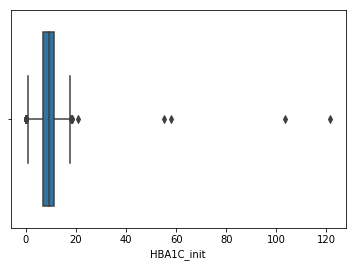

In [100]:
sns.boxplot(hba1c_results['HBA1C_init'])
#sns.boxplot(hba1c_results['HBA1C_last'])

In [101]:
#Remove values like 100 here for initial results; where test result==0 and result <15 removed. 
hba1c_results= hba1c_results.loc[hba1c_results['HBA1C_init'] < 15]  #54 rows dropped
hba1c_results= hba1c_results.loc[hba1c_results['HBA1C_init'] > 4]  # 3 rows dropped
hba1c_results= hba1c_results.loc[hba1c_results['HBA1C_init'] != 0] #749 rows dropped


hba1c_results= hba1c_results.loc[hba1c_results['HBA1C_last'] < 15]  #7 rows dropped
hba1c_results= hba1c_results.loc[hba1c_results['HBA1C_last'] > 4]  # 3 rows dropped
hba1c_results= hba1c_results.loc[hba1c_results['HBA1C_last'] != 0] #192 rows dropped


In [102]:
hba1c_results.shape
hba1c_results.head(10)

,IdPaciente,HBA1C_init,HBA1C_last
0,1,8.2,9.10
2,5,6.5,5.40
3,6,6.5,7.14
4,7,9.8,8.00
5,8,6.9,6.90
8,11,6.2,7.00
9,12,5.7,5.70
10,13,8.2,8.20
11,14,12.0,12.40
12,15,12.0,7.51


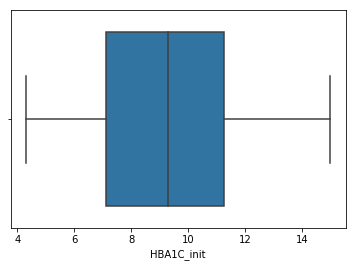

In [103]:
sns.boxplot(hba1c_results['HBA1C_init'])
#sns.boxplot(hba1c_results['HBA1C_last'])

In [104]:
#Merge with nutrition appointments dataset
data_hba1c = pd.merge(left=hba1c_results, right=desc_data, how ='inner', on=['IdPaciente'])
data_hba1c.info()
data_hba1c.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11163 entries, 0 to 11162
Data columns (total 9 columns):
IdPaciente          11163 non-null int64
HBA1C_init          11163 non-null float64
HBA1C_last          11163 non-null float64
Q1                  11163 non-null float64
Q2                  11163 non-null float64
Q3                  11163 non-null float64
Q4                  11163 non-null float64
level               11163 non-null object
num_nutri_assess    11163 non-null int64
dtypes: float64(6), int64(2), object(1)
memory usage: 872.1+ KB


,IdPaciente,HBA1C_init,HBA1C_last,Q1,Q2,Q3,Q4,level,num_nutri_assess
0,1,8.2,9.10,12.0,7.0,2.0,3.0,low,3
1,5,6.5,5.40,6.5,6.5,10.0,6.5,low,15
2,6,6.5,7.14,10.0,10.0,10.0,10.0,high,33
3,7,9.8,8.00,3.0,2.0,2.0,2.0,low,7
4,11,6.2,7.00,6.5,2.0,2.0,2.0,low,3


In [105]:
#Create a change in BMI: Drop is a good sign
data_hba1c['Change_hba1c'] = data_hba1c['HBA1C_last'] - data_hba1c['HBA1C_init']
data_hba1c.info()
data_hba1c.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11163 entries, 0 to 11162
Data columns (total 10 columns):
IdPaciente          11163 non-null int64
HBA1C_init          11163 non-null float64
HBA1C_last          11163 non-null float64
Q1                  11163 non-null float64
Q2                  11163 non-null float64
Q3                  11163 non-null float64
Q4                  11163 non-null float64
level               11163 non-null object
num_nutri_assess    11163 non-null int64
Change_hba1c        11163 non-null float64
dtypes: float64(7), int64(2), object(1)
memory usage: 959.3+ KB


,IdPaciente,HBA1C_init,HBA1C_last,Q1,Q2,Q3,Q4,level,num_nutri_assess,Change_hba1c
0,1,8.2,9.10,12.0,7.0,2.0,3.0,low,3,0.90
1,5,6.5,5.40,6.5,6.5,10.0,6.5,low,15,-1.10
2,6,6.5,7.14,10.0,10.0,10.0,10.0,high,33,0.64
3,7,9.8,8.00,3.0,2.0,2.0,2.0,low,7,-1.80
4,11,6.2,7.00,6.5,2.0,2.0,2.0,low,3,0.80
5,14,12.0,12.40,8.0,12.0,2.0,2.0,medium,4,0.40
6,15,12.0,7.51,10.0,6.5,10.0,10.0,high,34,-4.49
7,19,12.0,6.70,8.0,2.0,2.0,2.0,low,16,-5.30
8,20,12.0,6.00,10.0,2.0,2.0,2.0,low,5,-6.00
9,23,11.0,7.60,10.0,10.0,10.0,10.0,high,9,-3.40


The average drop in HBA1C is much higher for those in high and medium engagement clusters. Those in low group have lower HBA1C

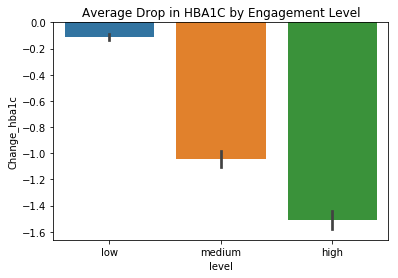

In [106]:
#plt.title('Average Drop in HBA1C')
plt.title('Average Drop in HBA1C by Engagement Level')
ax = sns.barplot(x= 'level', y= 'Change_hba1c', data=data_hba1c, order=["low", "medium", 'high'])

##Is there correlation between number of nutritional visits and the change in HBA1c test results? 
There is no apparent trend or correlation between change in HBA1c test results and the number of nutritional appointments visited. Although, the sign of the correlation is what we expected (negative), it is not high. This may be due to problem of data. We noticed that low level engagement patients drop out fast. Whereas medium and high engagement patient stay longer and give more tests. We are comparing the patients' initial and the last test results by the date, it may be that the patients who drop out early won't be able to notice any change right away. We compared the test results of the initial and 3rd month or 6th month results, but the changes are not substantial during this short period of time.  

In [107]:
data_hba1c.corr()

,IdPaciente,HBA1C_init,HBA1C_last,Q1,Q2,Q3,Q4,num_nutri_assess,Change_hba1c
IdPaciente,1.000000,0.073624,0.103714,0.222110,-0.218078,-0.310769,-0.344975,-0.325924,0.033910
HBA1C_init,0.073624,1.000000,0.734922,-0.103443,-0.022322,-0.067560,-0.042289,-0.049105,-0.434338
HBA1C_last,0.103714,0.734922,1.000000,-0.108700,-0.297275,-0.275290,-0.200556,-0.259276,0.291641
Q1,0.222110,-0.103443,-0.108700,1.000000,0.168082,0.113555,0.072505,0.057880,0.001525
Q2,-0.218078,-0.022322,-0.297275,0.168082,1.000000,0.620812,0.454677,0.527676,-0.363368
Q3,-0.310769,-0.067560,-0.275290,0.113555,0.620812,1.000000,0.657214,0.642667,-0.270359
Q4,-0.344975,-0.042289,-0.200556,0.072505,0.454677,0.657214,1.000000,0.692864,-0.206738
num_nutri_assess,-0.325924,-0.049105,-0.259276,0.057880,0.527676,0.642667,0.692864,1.000000,-0.275119
Change_hba1c,0.033910,-0.434338,0.291641,0.001525,-0.363368,-0.270359,-0.206738,-0.275119,1.000000


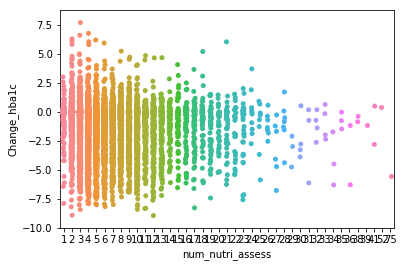

In [108]:
ax = sns.stripplot(x="num_nutri_assess", y="Change_hba1c", data=data_hba1c)

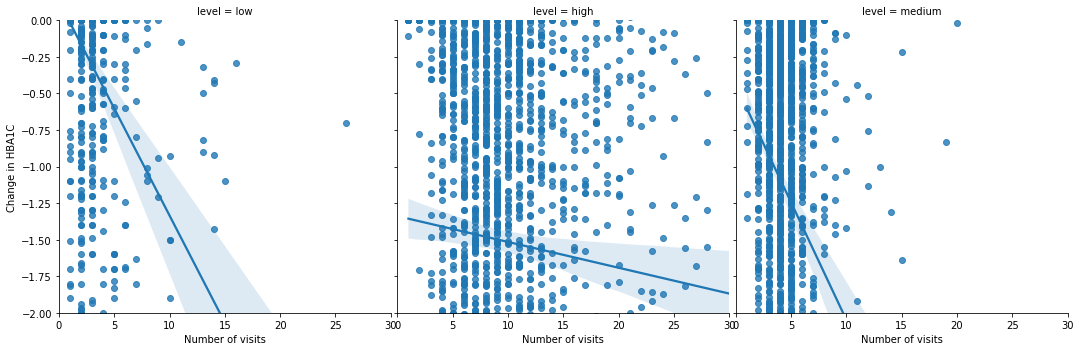

In [109]:
#Scatter plot of Number of Assessments and Change in HBA1A
g = sns.lmplot(x="num_nutri_assess", y="Change_hba1c", col="level", data=data_hba1c)
g = (g.set_axis_labels("Number of visits", "Change in HBA1C").set(xlim=(0, 30), ylim=(-2, 0)).fig.subplots_adjust(wspace=.02))


In [110]:
list_eng=[]
list_eng.append(data_hba1c.loc[data_hba1c['level'] =='low'].count()[1])
list_eng.append(data_hba1c.loc[data_hba1c['level'] =='medium'].count()[1])
list_eng.append(data_hba1c.loc[data_hba1c['level'] =='high'].count()[1])
list_eng

[4335, 3814, 3014]

In [112]:
lab_df.Seguimiento.unique()

array(['INICIO', '3 MESES', '6 MESES', '9 MESES', 'FINAL', '12 MESES'],
      dtype=object)

In [129]:
patient_HbA1c_high = pd.merge(left=high_df[['IdPaciente']], right=lab_df[['IdPaciente','Fecha','Seguimiento','HBA1C']], how ='inner', left_on=['IdPaciente'], right_on=['IdPaciente'])
patient_HbA1c_medium = pd.merge(left=medium_df[['IdPaciente']], right=lab_df[['IdPaciente','Fecha','Seguimiento','HBA1C']], how ='inner', left_on=['IdPaciente'], right_on=['IdPaciente'])
patient_HbA1c_low = pd.merge(left=low_df[['IdPaciente']], right=lab_df[['IdPaciente','Fecha','Seguimiento','HBA1C']], how ='inner', left_on=['IdPaciente'], right_on=['IdPaciente'])

In [130]:
patient_HbA1c_low.dropna(inplace = True)
patient_HbA1c_low.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9286 entries, 0 to 9290
Data columns (total 4 columns):
IdPaciente     9286 non-null float64
Fecha          9286 non-null datetime64[ns]
Seguimiento    9286 non-null object
HBA1C          9286 non-null float64
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 362.7+ KB


In [131]:
patient_HbA1c_medium.dropna(inplace = True)
patient_HbA1c_medium.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7227 entries, 0 to 7237
Data columns (total 4 columns):
IdPaciente     7227 non-null float64
Fecha          7227 non-null datetime64[ns]
Seguimiento    7227 non-null object
HBA1C          7227 non-null float64
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 282.3+ KB


In [132]:
patient_HbA1c_high.dropna(inplace = True)
patient_HbA1c_high.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14299 entries, 0 to 14374
Data columns (total 4 columns):
IdPaciente     14299 non-null float64
Fecha          14299 non-null datetime64[ns]
Seguimiento    14299 non-null object
HBA1C          14299 non-null float64
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 558.6+ KB


In [133]:
print("Records for high engagement : "+ str(patient_HbA1c_high.shape[0]))
print("Records for medium engagement : "+ str(patient_HbA1c_medium.shape[0]))
print("Records for low engagement : "+ str(patient_HbA1c_low.shape[0]))

Records for high engagement : 14299
Records for medium engagement : 7227
Records for low engagement : 9286


In [134]:
patient_HbA1c_high['Year'] = pd.DatetimeIndex(patient_HbA1c_high.Fecha).year 
patient_HbA1c_medium['Year'] = pd.DatetimeIndex(patient_HbA1c_medium.Fecha).year
patient_HbA1c_low['Year'] = pd.DatetimeIndex(patient_HbA1c_low.Fecha).year

In [135]:
data_df = pd.DataFrame([[patient_HbA1c_low.shape[0],'Low'],  [patient_HbA1c_medium.shape[0], 'Medium'], [patient_HbA1c_high.shape[0], 'High']], columns = ['Count', 'Engagement'])

In [144]:
avg_patients_high = patient_HbA1c_high.groupby('Year')['IdPaciente'].nunique().reset_index().rename(columns={'IdPaciente':'Count_Patients'}).reindex(columns=['Year','Count_Patients'])

total_appoint = []
for i in avg_patients['Year']:
    total_appoint.append(patient_HbA1c_high[patient_HbA1c_high['Year'] == i]['IdPaciente'].count())
    
avg_patients_high['Total_Appoint'] = total_appoint

avg_patients_high.head(6)

,Year,Count_Patients,Total_Appoint
0,2011,1,1
1,2012,42,77
2,2013,218,569
3,2014,581,1741
4,2015,1980,5224
5,2016,2016,6687


In [150]:
avg_patients_med = patient_HbA1c_medium.groupby('Year')['IdPaciente'].nunique().reset_index().rename(columns={'IdPaciente':'Count_Patients'}).reindex(columns=['Year','Count_Patients'])

total_appoint = []
for i in avg_patients_med['Year']:
    total_appoint.append(patient_HbA1c_medium[patient_HbA1c_medium['Year'] == i]['IdPaciente'].count())
        
avg_patients_med['Total_Appoint'] = total_appoint

avg_patients_med.head(6)

,Year,Count_Patients,Total_Appoint
0,2012,53,82
1,2013,223,498
2,2014,502,1051
3,2015,1033,1809
4,2016,1649,3787


In [151]:
avg_patients_low = patient_HbA1c_low.groupby('Year')['IdPaciente'].nunique().reset_index().rename(columns={'IdPaciente':'Count_Patients'}).reindex(columns=['Year','Count_Patients'])

total_appoint = []
for i in avg_patients_low['Year']:
    total_appoint.append(patient_HbA1c_low[patient_HbA1c_low['Year'] == i]['IdPaciente'].count())
        
avg_patients_low['Total_Appoint'] = total_appoint

avg_patients_low.head(6)

,Year,Count_Patients,Total_Appoint
0,2011,6,6
1,2012,223,357
2,2013,526,697
3,2014,985,1385
4,2015,1407,1683
5,2016,4199,5158


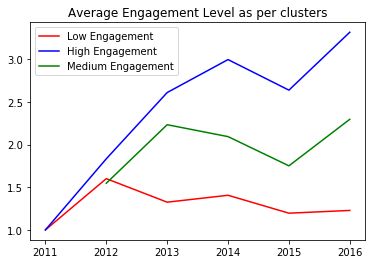

In [416]:
low_eng = plt.plot(avg_patients_low.Year, avg_patients_low.Total_Appoint/avg_patients_low.Count_Patients, 
                   color='red',label='Low Engagement')

high_eng = plt.plot(avg_patients_high.Year, avg_patients_high.Total_Appoint/avg_patients_high.Count_Patients, 
                    color='blue', label='High Engagement')

medium_eng = plt.plot(avg_patients_med.Year, avg_patients_med.Total_Appoint/avg_patients_med.Count_Patients, 
                      color='green', label = 'Medium Engagement')
plt.legend(loc='best')
plt.title('Average Engagement Level as per clusters')
plt.show(block=False)

In [121]:
patient_HbA1c_high.head()

,IdPaciente,Fecha,Seguimiento,HBA1C
0,6.0,2011-12-16,INICIO,6.5
1,6.0,2012-03-15,3 MESES,7.0
2,6.0,2012-06-14,6 MESES,6.3
3,6.0,2012-09-14,9 MESES,6.4
4,6.0,2012-12-14,FINAL,0.0


In [122]:
patient_HbA1c_medium.head()

,IdPaciente,Fecha,Seguimiento,HBA1C
0,28.0,2012-10-24,INICIO,11.0
1,28.0,2013-04-16,INICIO,8.0
2,28.0,2013-07-17,3 MESES,8.9
3,28.0,2013-10-22,6 MESES,8.3
4,28.0,2014-04-10,9 MESES,7.9


In [123]:
patient_HbA1c_low.head()

,IdPaciente,Fecha,Seguimiento,HBA1C
0,1.0,2011-12-01,INICIO,8.2
1,1.0,2012-03-08,3 MESES,12.0
2,1.0,2012-07-06,6 MESES,9.1
3,3.0,2011-12-12,INICIO,6.6
4,3.0,2014-09-08,INICIO,7.9


In [169]:
patient_HbA1c_low= patient_HbA1c_low.loc[patient_HbA1c_low['HBA1C'] < 15]
patient_HbA1c_low= patient_HbA1c_low.loc[patient_HbA1c_low['HBA1C'] > 4] 
patient_HbA1c_low= patient_HbA1c_low.loc[patient_HbA1c_low['HBA1C'] != 0]

patient_HbA1c_medium= patient_HbA1c_medium.loc[patient_HbA1c_medium['HBA1C'] < 15]
patient_HbA1c_medium= patient_HbA1c_medium.loc[patient_HbA1c_medium['HBA1C'] > 4] 
patient_HbA1c_medium= patient_HbA1c_medium.loc[patient_HbA1c_medium['HBA1C'] != 0]

patient_HbA1c_high = patient_HbA1c_high.loc[patient_HbA1c_high['HBA1C'] < 15]
patient_HbA1c_high = patient_HbA1c_high.loc[patient_HbA1c_high['HBA1C'] > 4] 
patient_HbA1c_high = patient_HbA1c_high.loc[patient_HbA1c_high['HBA1C'] != 0]

In [170]:
print('Avg HBA1C for low engagement: '+str(patient_HbA1c_low.HBA1C.mean()))
print('Avg HBA1C for medium engagement: '+str(patient_HbA1c_medium.HBA1C.mean()))
print('Avg HBA1C for high engagement: '+str(patient_HbA1c_high.HBA1C.mean()))

Avg HBA1C for low engagement: 9.021245962159675
Avg HBA1C for medium engagement: 8.40601397583345
Avg HBA1C for high engagement: 7.8086228943899485


In [171]:
data_df = pd.DataFrame([[patient_HbA1c_low.HBA1C.mean(),'Low'],  [patient_HbA1c_medium.HBA1C.mean(), 'Medium'], [patient_HbA1c_high.HBA1C.mean(), 'High']], columns = ['Avg HBA1C', 'Engagement'])

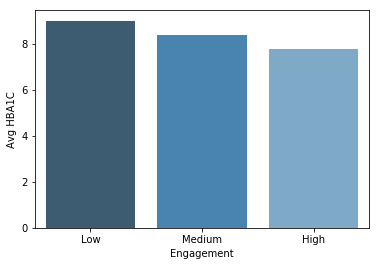

In [172]:
ax = sns.barplot(x=data_df['Engagement'], y=data_df['Avg HBA1C'],
                 palette="Blues_d")

In [173]:
segments_list = lab_df.Seguimiento.unique()
avg_seg_hba1c_high = []
for i in segments_list:
    avg_seg_hba1c_high.append(patient_HbA1c_high[patient_HbA1c_high['Seguimiento'] == i]['HBA1C'].mean())
    
hba1c_high = pd.DataFrame(columns = ['Segment','Avg_HBA1C'])
hba1c_high['Segment'] = segments_list
hba1c_high['Avg_HBA1C'] = avg_seg_hba1c_high

hba1c_high.head(6)

,Segment,Avg_HBA1C
0,INICIO,8.803529
1,3 MESES,7.435380
2,6 MESES,7.452034
3,9 MESES,7.512594
4,FINAL,7.499447
5,12 MESES,7.451077


In [174]:
segments_list = lab_df.Seguimiento.unique()
avg_seg_hba1c_med = []
for i in segments_list:
    avg_seg_hba1c_med.append(patient_HbA1c_medium[patient_HbA1c_medium['Seguimiento'] == i]['HBA1C'].mean())
    
hba1c_med = pd.DataFrame(columns = ['Segment','Avg_HBA1C'])
hba1c_med['Segment'] = segments_list
hba1c_med['Avg_HBA1C'] = avg_seg_hba1c_med

hba1c_med.head(6)

,Segment,Avg_HBA1C
0,INICIO,9.222473
1,3 MESES,7.825091
2,6 MESES,7.810370
3,9 MESES,8.055205
4,FINAL,7.909434
5,12 MESES,7.963665


In [175]:
segments_list = lab_df.Seguimiento.unique()
avg_seg_hba1c_low = []
for i in segments_list:
    avg_seg_hba1c_low.append(patient_HbA1c_low[patient_HbA1c_low['Seguimiento'] == i]['HBA1C'].mean())
    
hba1c_low = pd.DataFrame(columns = ['Segment','Avg_HBA1C'])
hba1c_low['Segment'] = segments_list
hba1c_low['Avg_HBA1C'] = avg_seg_hba1c_low

hba1c_low.head(6)

,Segment,Avg_HBA1C
0,INICIO,9.336160
1,3 MESES,7.821068
2,6 MESES,7.963391
3,9 MESES,7.755786
4,FINAL,7.336111
5,12 MESES,8.117593


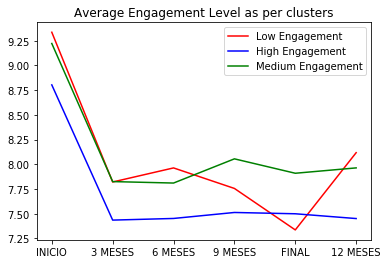

In [417]:
low_eng = plt.plot(hba1c_low.Segment, hba1c_low.Avg_HBA1C, 
                   color='red',label='Low Engagement')

high_eng = plt.plot(hba1c_high.Segment, hba1c_high.Avg_HBA1C, 
                    color='blue', label='High Engagement')

medium_eng = plt.plot(hba1c_med.Segment, hba1c_med.Avg_HBA1C,
                      color='green', label = 'Medium Engagement')

plt.legend(loc='best')
plt.title('Average Engagement Level as per clusters')
plt.show(block=False)

Count:36


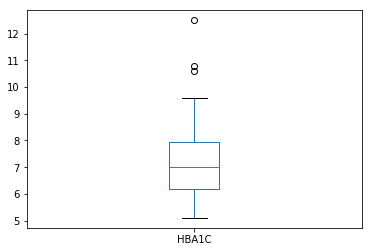

In [184]:
print('Count:'+str(patient_HbA1c_low[patient_HbA1c_low['Seguimiento'] == 'FINAL']['IdPaciente'].count()))
patient_HbA1c_low[patient_HbA1c_low['Seguimiento'] == 'FINAL']['HBA1C'].plot.box()

#### Data Preperation for Task 2

In [322]:
engagement_dataset = pd.DataFrame()
dfs = [high_df,medium_df, low_df]
engagement_dataset = pd.concat(dfs, ignore_index=True)
engagement_dataset.head()

,IdPaciente,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,cluster,Q1,Q2,Q3,Q4
0,0.0,6.75,6.75,6.2,6.75,5.0,6.25,5.67,5.25,5.67,6.75,7.0,7.0,1,6.75,6.75,5.67,7.0
1,6.0,10.00,2.00,2.0,10.00,2.0,2.00,10.00,8.00,2.00,10.00,2.0,2.0,1,10.00,10.00,10.00,10.0
2,15.0,10.00,8.00,8.0,6.50,2.0,2.00,2.00,2.00,10.00,8.00,7.0,10.0,1,10.00,6.50,10.00,10.0
3,23.0,10.00,2.00,2.0,10.00,2.0,2.00,10.00,8.00,3.00,10.00,2.0,2.0,1,10.00,10.00,10.00,10.0
4,96.0,10.00,6.00,8.0,10.00,2.0,2.00,10.00,8.00,2.00,3.00,10.0,6.0,1,10.00,10.00,10.00,10.0


In [323]:
engagement_dataset['level'] = np.where(final_dataset['cluster']==0, 'low',
                                 np.where(final_dataset['cluster']==1, 'high', 'medium'))
engagement_dataset.head()

,IdPaciente,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,cluster,Q1,Q2,Q3,Q4,level
0,0.0,6.75,6.75,6.2,6.75,5.0,6.25,5.67,5.25,5.67,6.75,7.0,7.0,1,6.75,6.75,5.67,7.0,high
1,6.0,10.00,2.00,2.0,10.00,2.0,2.00,10.00,8.00,2.00,10.00,2.0,2.0,1,10.00,10.00,10.00,10.0,high
2,15.0,10.00,8.00,8.0,6.50,2.0,2.00,2.00,2.00,10.00,8.00,7.0,10.0,1,10.00,6.50,10.00,10.0,high
3,23.0,10.00,2.00,2.0,10.00,2.0,2.00,10.00,8.00,3.00,10.00,2.0,2.0,1,10.00,10.00,10.00,10.0,high
4,96.0,10.00,6.00,8.0,10.00,2.0,2.00,10.00,8.00,2.00,3.00,10.0,6.0,1,10.00,10.00,10.00,10.0,high


In [453]:
engagement_dataset.shape[0]

13907

In [454]:
final_outcome.shape[0]

12367

In [329]:
#lab_df_initial=lab_df.loc[lab_df.groupby('IdPaciente')['Fecha'].idxmin()]
nutri_data = nutri_assess_df[['IdPaciente', 'Fecha', 'year','month', 'quarter']]
nutri_data.head()

,IdPaciente,Fecha,year,month,quarter
0,528,2013-10-05,2013,10,4
1,97,2012-03-07,2012,3,1
2,244,2012-05-10,2012,5,2
3,244,2012-07-12,2012,7,3
4,244,2012-08-09,2012,8,3


In [370]:
nutri_sort_data = nutri_data.sort_values(by=['IdPaciente','year', 'month'])
nutri_sort_data.reset_index(inplace = True)
nutri_sort_data.drop(columns=['index'],inplace = True )
nutri_sort_data.head()

,IdPaciente,Fecha,year,month,quarter
0,1,2012-01-05,2012,1,1
1,1,2012-03-08,2012,3,1
2,1,2012-12-01,2012,12,4
3,2,2011-11-30,2011,11,4
4,2,2012-02-06,2012,2,1


In [373]:
count_assess = nutri_sort_data.groupby(nutri_sort_data.columns.tolist()).size().reset_index().rename(columns={0:'num_assess'})
count_assess.head()

,IdPaciente,Fecha,year,month,quarter,num_assess
0,1,2012-01-05,2012,1,1,1
1,1,2012-03-08,2012,3,1,1
2,1,2012-12-01,2012,12,4,1
3,2,2011-11-30,2011,11,4,1
4,2,2012-02-06,2012,2,1,1


In [396]:
month_list = [0] * 72
for i in range(72):
    month_list[i] = "M" + str(i+1)
col_list = ["IdPaciente"]
col_list += month_list

final_outcome = pd.DataFrame(columns = col_list)
final_outcome.columns

Index(['IdPaciente', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9',
       'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M19',
       'M20', 'M21', 'M22', 'M23', 'M24', 'M25', 'M26', 'M27', 'M28', 'M29',
       'M30', 'M31', 'M32', 'M33', 'M34', 'M35', 'M36', 'M37', 'M38', 'M39',
       'M40', 'M41', 'M42', 'M43', 'M44', 'M45', 'M46', 'M47', 'M48', 'M49',
       'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59',
       'M60', 'M61', 'M62', 'M63', 'M64', 'M65', 'M66', 'M67', 'M68', 'M69',
       'M70', 'M71', 'M72'],
      dtype='object')

In [397]:
def process_pat(df):
    """ 
    Creating a list of engagement levels as 2 for capturing default of no engagement i.e. level 2
    and capturing 4 years of data to having teh maximum size of the list as 48
    """
    list_val = [0] * 72
    index = 0 
    for i in range(df.shape[0]):
        if i==0:
            list_val[index] = df['num_assess'].iloc[i]
            index += 1
        else: 
            diff_mon = ((df['year'].iloc[i] - df['year'].iloc[i-1])*12 + (df['month'].iloc[i] - df['month'].iloc[i-1]))
            index += (diff_mon - 1)
            list_val[index] = df['num_assess'].iloc[i]
            index += 1
    pat_id = [df['IdPaciente'].iloc[i]]
    out_list = pat_id + list_val
    final_outcome.loc[len(final_outcome)] = out_list

In [398]:
index = 0
for i in range(count_assess.shape[0]-1):
    if count_assess['IdPaciente'].iloc[i] == count_assess['IdPaciente'].iloc[i+1]:
        continue
    else:
        if i==(count_assess.shape[0]-1):
            pat_df = count_assess[index:i+2].copy()
            #print(pat_df)
        else:
            pat_df = count_assess[index:i+1].copy()
            #print(pat_df)
        process_pat(pat_df)
        index = i+1

In [399]:
final_outcome = final_outcome.loc[:,'IdPaciente':'M12']
final_outcome.head()

,IdPaciente,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12
0,1,1,0,1,0,0,0,0,0,0,0,0,1
1,2,1,0,0,1,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0,1,0,0
4,5,1,0,0,1,0,0,0,1,0,0,0,1


In [401]:
final_outcome['Nutri_Q1'] = final_outcome[['M1','M2','M3']].sum(axis=1)
final_outcome['Nutri_Q2'] = final_outcome[['M4','M5','M6']].sum(axis=1)
final_outcome['Nutri_Q3'] = final_outcome[['M7','M8','M9']].sum(axis=1)
final_outcome['Nutri_Q4'] = final_outcome[['M10','M11','M12']].sum(axis=1)

final_outcome['Nutri_B_Q1'] = np.where(final_outcome['Nutri_Q1']>0, 1, 0)
final_outcome['Nutri_B_Q2'] = np.where(final_outcome['Nutri_Q2']>0, 1, 0)
final_outcome['Nutri_B_Q3'] = np.where(final_outcome['Nutri_Q3']>0, 1, 0)
final_outcome['Nutri_B_Q4'] = np.where(final_outcome['Nutri_Q4']>0, 1, 0)

final_outcome.head()

,IdPaciente,M1,M2,M3,M4,M5,M6,M7,M8,M9,...,M11,M12,Nutri_Q1,Nutri_Q2,Nutri_Q3,Nutri_Q4,Nutri_B_Q1,Nutri_B_Q2,Nutri_B_Q3,Nutri_B_Q4
0,1,1,0,1,0,0,0,0,0,0,...,0,1,2.0,0.0,0.0,1.0,1,0,0,1
1,2,1,0,0,1,0,0,0,0,0,...,0,0,1.0,1.0,0.0,0.0,1,1,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,1.0,0.0,0.0,0.0,1,0,0,0
3,4,1,0,0,0,0,0,0,0,0,...,0,0,1.0,0.0,0.0,1.0,1,0,0,1
4,5,1,0,0,1,0,0,0,1,0,...,0,1,1.0,1.0,1.0,1.0,1,1,1,1


In [405]:
# USing an inner join to combine the dataset as for now our focus is on the patients that have attended atleast 1 nutrion assessment
outcome_var = pd.merge(left=engagement_dataset[['IdPaciente','Q1','Q2','Q3','Q4','level']],
                      right=final_outcome[['IdPaciente','Nutri_Q1','Nutri_Q2','Nutri_Q3','Nutri_Q4','Nutri_B_Q1','Nutri_B_Q2','Nutri_B_Q3','Nutri_B_Q4']],
                      how='inner',
                      on=['IdPaciente'])
outcome_var = outcome_var.sort_values(by=['IdPaciente'])
outcome_var.reset_index(inplace=True)
outcome_var.drop(columns=['index'], inplace=True)
outcome_var.head()

,IdPaciente,Q1,Q2,Q3,Q4,level,Nutri_Q1,Nutri_Q2,Nutri_Q3,Nutri_Q4,Nutri_B_Q1,Nutri_B_Q2,Nutri_B_Q3,Nutri_B_Q4
0,1,12.0,7.0,2.0,3.0,low,2.0,0.0,0.0,1.0,1,0,0,1
1,2,3.0,2.0,2.0,2.0,low,1.0,1.0,0.0,0.0,1,1,0,0
2,3,6.5,3.0,2.0,2.0,low,1.0,0.0,0.0,0.0,1,0,0,0
3,4,10.0,2.0,2.0,2.0,low,1.0,0.0,0.0,1.0,1,0,0,1
4,5,6.5,6.5,10.0,6.5,low,1.0,1.0,1.0,1.0,1,1,1,1


In [491]:
# Read the II Datos CMU (BAL) file from s3
filename = 'II Datos CMU (BAL).xlsx'
sheetname = 'nutricionvaloracioninicial'
nutri_init_assess_df = read_data_from_excel(filename,sheetname,bucketname)

In [492]:
len(nutri_init_assess_df['IdPaciente'].unique())

12465

In [493]:
# Delete duplicate records for the patients and keeping the first record for them
nutri_init_assess_df.sort_values(by=['IdPaciente'], inplace = True)
nutri_init_assess_df.drop_duplicates(subset ="IdPaciente", keep = 'first', inplace = True) 

In [494]:
nutri_init_assess_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12465 entries, 1009 to 12778
Data columns (total 46 columns):
IdValoracionNutricionalInicial      12465 non-null int64
IdPaciente                          12465 non-null int64
Fecha                               12465 non-null object
Hora                                12465 non-null object
Usuario                             12465 non-null object
QuienPreparaAlimentos               12408 non-null object
AlimentosDisgustan                  12364 non-null object
EndulzanteUtilizado                 12194 non-null object
AlteracionesDigestivas              12456 non-null float64
AlteracionesDigestivasCuales        6582 non-null object
Alergias                            12456 non-null float64
AlergiasCuales                      1877 non-null object
Cafe                                12456 non-null float64
CafeTipo                            8909 non-null object
CafeCantidad                        8931 non-null object
Refrescos            

In [495]:
# Drop values with Nan
nutri_init_assess_df.drop(nutri_init_assess_df[nutri_init_assess_df['Edad'].isnull()].index , inplace=True)

In [496]:
intial_assess_dataset = nutri_init_assess_df[['IdPaciente','Edad','IMC','Alcohol','Tabaco','Refrescos','Cafe','ActividadFisica']].copy()
intial_assess_dataset.reset_index(inplace=True)
intial_assess_dataset.drop(columns=['index'], inplace=True)
intial_assess_dataset.head()

,IdPaciente,Edad,IMC,Alcohol,Tabaco,Refrescos,Cafe,ActividadFisica
0,0,43.0,0.000,NaN,NaN,0.0,0.0,0.0
1,1,86.0,24.382,ACTIVO,INACTIVO,1.0,1.0,0.0
2,2,41.0,33.515,ACTIVO,ACTIVO,1.0,1.0,0.0
3,3,71.0,28.382,AUSENTE,AUSENTE,0.0,1.0,1.0
4,4,36.0,39.730,ACTIVO,ACTIVO,1.0,1.0,0.0


In [497]:
# Inorder to keep not lose too much of data we are planning to replace missing or null values with appropriate data

# Replace age with median
median = intial_assess_dataset['Edad'].median()
intial_assess_dataset['Edad'] = np.where(intial_assess_dataset['Edad']==0, median, intial_assess_dataset['Edad'])

# Replace BMI with median
median = intial_assess_dataset['IMC'].median()
intial_assess_dataset['IMC'] = np.where(intial_assess_dataset['IMC']==0, median, intial_assess_dataset['IMC'])

# Replace Nan in Alcohol & Tabaco with Absent
intial_assess_dataset['Alcohol'] = np.where(intial_assess_dataset['Alcohol'].isnull(), 'AUSENTE', intial_assess_dataset['Alcohol'])
intial_assess_dataset['Tabaco'] = np.where(intial_assess_dataset['Tabaco'].isnull(), 'AUSENTE', intial_assess_dataset['Tabaco'])

# Replace Categorical values in Alcohol and Tabaco with numerical categories
# 0 - AUSENTE ; 1 - INACTIVO ; 2 - ACTIVO
intial_assess_dataset['Alcohol'] = np.where(intial_assess_dataset['Alcohol']=='AUSENTE', 0,
                                           np.where(intial_assess_dataset['Alcohol']=='INACTIVO',1,2))
intial_assess_dataset['Tabaco'] = np.where(intial_assess_dataset['Tabaco']=='AUSENTE', 0,
                                           np.where(intial_assess_dataset['Tabaco']=='INACTIVO',1,2))
                                           
intial_assess_dataset.head(10)

,IdPaciente,Edad,IMC,Alcohol,Tabaco,Refrescos,Cafe,ActividadFisica
0,0,43.0,29.2745,0,0,0.0,0.0,0.0
1,1,86.0,24.3820,2,1,1.0,1.0,0.0
2,2,41.0,33.5150,2,2,1.0,1.0,0.0
3,3,71.0,28.3820,0,0,0.0,1.0,1.0
4,4,36.0,39.7300,2,2,1.0,1.0,0.0
5,5,54.0,24.3500,1,0,1.0,1.0,0.0
6,6,57.0,26.4720,2,0,1.0,1.0,0.0
7,7,54.0,27.6800,0,0,1.0,1.0,0.0
8,8,35.0,35.7820,0,0,1.0,1.0,0.0
9,9,60.0,32.5670,2,0,1.0,0.0,0.0


In [498]:
initial_lab_dataset = lab_df[['IdPaciente','Fecha','HBA1C','Colesterol']].copy()
initial_lab_dataset.reset_index(inplace=True)
initial_lab_dataset.drop(columns=['index'], inplace=True)
initial_lab_dataset.head()

,IdPaciente,Fecha,HBA1C,Colesterol
0,786,2013-02-14,10.8,264.0
1,785,2013-02-15,10.1,221.0
2,771,2013-02-08,7.5,155.0
3,770,2013-02-07,6.7,136.0
4,772,2013-02-07,13.0,318.0


In [499]:
initial_lab_dataset.dropna(inplace=True)
initial_lab_dataset.head()

,IdPaciente,Fecha,HBA1C,Colesterol
0,786,2013-02-14,10.8,264.0
1,785,2013-02-15,10.1,221.0
2,771,2013-02-08,7.5,155.0
3,770,2013-02-07,6.7,136.0
4,772,2013-02-07,13.0,318.0


In [500]:
initial_lab_dataset.sort_values(by=['IdPaciente','Fecha'], inplace=True)
initial_lab_dataset.reset_index(inplace=True)
initial_lab_dataset.drop(columns=['index'], inplace=True)
initial_lab_dataset.head()

,IdPaciente,Fecha,HBA1C,Colesterol
0,1,2011-12-01,8.2,209.0
1,1,2012-03-08,12.0,155.0
2,1,2012-07-06,9.1,157.0
3,3,2011-12-12,6.6,176.0
4,3,2014-09-08,7.9,242.0


In [503]:
initial_lab_dataset.drop_duplicates(subset ="IdPaciente", keep = 'first', inplace = True) 
initial_lab_dataset.drop(columns=['Fecha'], inplace=True)
initial_lab_dataset.head()

,IdPaciente,HBA1C,Colesterol
0,1,8.2,209.0
3,3,6.6,176.0
6,5,6.5,236.0
19,6,6.5,186.0
41,7,9.8,157.0


In [504]:
demographic_var = pd.merge(left=intial_assess_dataset, right=initial_lab_dataset,
                    how='inner', on=['IdPaciente'])
demographic_var.head()

,IdPaciente,Edad,IMC,Alcohol,Tabaco,Refrescos,Cafe,ActividadFisica,HBA1C,Colesterol
0,1,86.0,24.382,2,1,1.0,1.0,0.0,8.2,209.0
1,3,71.0,28.382,0,0,0.0,1.0,1.0,6.6,176.0
2,5,54.0,24.350,1,0,1.0,1.0,0.0,6.5,236.0
3,6,57.0,26.472,2,0,1.0,1.0,0.0,6.5,186.0
4,7,54.0,27.680,0,0,1.0,1.0,0.0,9.8,157.0


In [505]:
# Balance - Tablas (Parte 1 ).xlsx
filename = 'Balance - Tablas (Parte 1 ).xlsx'
dataframe =  pd.ExcelFile('s3://{}/{}'.format(bucketname, filename))#, encoding = 'ISO-8859-1')

dataframe.sheet_names

['agenda',
 'deteccioncomplicacionesma',
 'deteccioncomplicacionesre',
 'hc',
 'hc_hospitalizaciones',
 'historialcitascanceladas',
 'historialcitasagendadas',
 'pacientes',
 'paquetes',
 'periodosrecetas',
 'pr_razones',
 'prospectos']

In [506]:
sheetname = 'pacientes'
patient_df = read_data_from_excel(filename,sheetname,bucketname)

In [507]:
display_basic_data(patient_df)

,IdPaciente,AnioNacimiento,IdConsultorio,Ciudad,Estado,Sexo,EstadoCivil,Religion,Ocupacion,Escolaridad,Fecha,Hora,IdInteresado,ProgramaRecomendados,SeguridadSocial,RecordarCita,EstadioValor,Estadio
0,1,1928.0,1,GUADALUPE,NUEVO LEÓN,H,SOLTERÍA,CATOLICA,ALBAÑIL,NINGUNA,2013-02-19,13:55:23,16432,0,imss,1,NaN,NaN
1,2,1971.0,1,GUADALUPE,NUEVO LEÓN,H,MATRIMONIO,NaN,INSTALACION MECANICA,LEER Y ESCRIBIR,2013-02-19,13:55:23,16433,0,IMSS,1,NaN,NaN
2,3,1943.0,1,GUADALUPE,NUEVO LEÓN,M,MATRIMONIO,CATOLICA,HOGAR,PREPARATORIA,2013-02-19,13:55:23,16434,0,IMSS,1,8.8,5.0
3,4,1976.0,1,SANTIAGO,NUEVO LEÓN,H,SOLTERÍA,CATOLICA,EMPLEADO,LICENCIATURA,2013-02-19,13:55:23,16435,0,PRIVADO,1,NaN,NaN
4,5,1958.0,1,GUADALUPE,NUEVO LEÓN,H,MATRIMONIO,CATÓLICA,CASADO,PREPARATORIA,2013-02-19,13:55:23,16436,1,NO SEGURIDAD SOCIAL,1,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14855 entries, 0 to 14854
Data columns (total 18 columns):
IdPaciente              14855 non-null int64
AnioNacimiento          14813 non-null float64
IdConsultorio           14855 non-null int64
Ciudad                  14807 non-null object
Estado                  14812 non-null object
Sexo                    14714 non-null object
EstadoCivil             14648 non-null object
Religion                5186 non-null object
Ocupacion               14236 non-null object
Escolaridad             5076 non-null object
Fecha                   14855 non-null datetime64[ns]
Hora                    14855 non-null object
IdInteresado            14855 non-null int64
ProgramaRecomendados    14855 non-null int64
SeguridadSocial         14488 non-null object
RecordarCita            14855 non-null int64
EstadioValor            3701 non-null float64
Estadio                 3701 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(5), object(9)
me

In [510]:
gender_df = patient_df[['IdPaciente','Sexo']].copy()
gender_df.reset_index(inplace=True)
gender_df.drop(columns=['index'], inplace=True)
gender_df.head()

,IdPaciente,Sexo
0,1,H
1,2,H
2,3,M
3,4,H
4,5,H


In [511]:
demographic_var = pd.merge(left=demographic_var, right=gender_df,
                    how='inner', on=['IdPaciente'])
demographic_var.head()

,IdPaciente,Edad,IMC,Alcohol,Tabaco,Refrescos,Cafe,ActividadFisica,HBA1C,Colesterol,Sexo
0,1,86.0,24.382,2,1,1.0,1.0,0.0,8.2,209.0,H
1,3,71.0,28.382,0,0,0.0,1.0,1.0,6.6,176.0,M
2,5,54.0,24.350,1,0,1.0,1.0,0.0,6.5,236.0,H
3,6,57.0,26.472,2,0,1.0,1.0,0.0,6.5,186.0,H
4,7,54.0,27.680,0,0,1.0,1.0,0.0,9.8,157.0,M


In [516]:
task2_dataset = pd.merge(left=demographic_var, right=outcome_var,
                    how='inner', on=['IdPaciente'])
print('No. of records: '+str(task2_dataset.shape[0]))
task2_dataset.head()

No. of records: 11861


,IdPaciente,Edad,IMC,Alcohol,Tabaco,Refrescos,Cafe,ActividadFisica,HBA1C,Colesterol,...,Q4,level,Nutri_Q1,Nutri_Q2,Nutri_Q3,Nutri_Q4,Nutri_B_Q1,Nutri_B_Q2,Nutri_B_Q3,Nutri_B_Q4
0,1,86.0,24.382,2,1,1.0,1.0,0.0,8.2,209.0,...,3.0,low,2.0,0.0,0.0,1.0,1,0,0,1
1,3,71.0,28.382,0,0,0.0,1.0,1.0,6.6,176.0,...,2.0,low,1.0,0.0,0.0,0.0,1,0,0,0
2,5,54.0,24.350,1,0,1.0,1.0,0.0,6.5,236.0,...,6.5,low,1.0,1.0,1.0,1.0,1,1,1,1
3,6,57.0,26.472,2,0,1.0,1.0,0.0,6.5,186.0,...,10.0,high,1.0,1.0,1.0,1.0,1,1,1,1
4,7,54.0,27.680,0,0,1.0,1.0,0.0,9.8,157.0,...,2.0,low,3.0,1.0,1.0,1.0,1,1,1,1


In [517]:
task2_dataset.to_csv('task2_dataset.csv')